Dimentionality reduction: Principal component analysis. 

In [2]:
import sklearn
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load Olivetti Face dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces.data  # shape: (400, 4096)
y = faces.target

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

# Plot the 2D projection
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Person ID')
plt.title("Olivetti Faces projected to 2D using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

ModuleNotFoundError: No module named 'sklearn'

K-nearest Neighbors

In [13]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Predicted labels:", y_pred, "True labels:", y_test)
# Test accuracy
accuracy = knn.score(X_test, y_test)
print("Test accuracy:", accuracy)

Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0] True labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Test accuracy: 1.0


LWR 

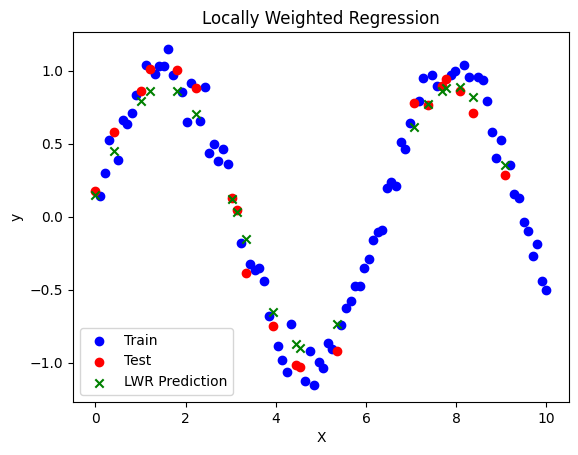

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset (best suited for LWR demonstration)
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = np.sin(X) + 0.1 * np.random.randn(100)
X = X.reshape(-1, 1)

# Locally Weighted Regression (LWR) implementation
def lwr_predict(X_train, y_train, x_query, tau=0.5):
    m = X_train.shape[0]
    W = np.exp(-np.square(X_train - x_query) / (2 * tau ** 2))
    W = np.diag(W.flatten())
    X_ = np.hstack((np.ones_like(X_train), X_train))
    x_query_ = np.array([1, x_query])
    theta = np.linalg.pinv(X_.T @ W @ X_) @ (X_.T @ W @ y_train)
    return x_query_ @ theta

# Predict for all test points
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = np.array([lwr_predict(X_train, y_train, x[0], tau=0.5) for x in X_test])

# Plot results
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.scatter(X_test, y_pred, color='green', label='LWR Prediction', marker='x')
plt.title('Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Linear Regression

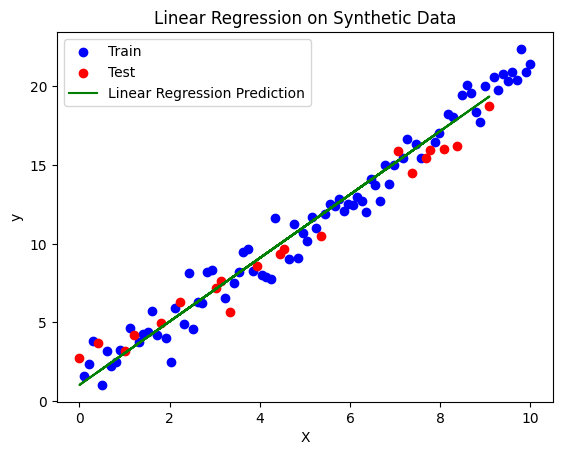

Model Coefficient (slope): 2.0160832335377323
Model Intercept: 1.0326144523517442
Test R^2 Score: 0.9550828729470466


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate a synthetic linear dataset
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.randn(100)  # y = 2x + 1 + noise
X = X.reshape(-1, 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Plot results
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X_test, y_pred, color='green', label='Linear Regression Prediction')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print("Model Coefficient (slope):", lr.coef_[0])
print("Model Intercept:", lr.intercept_)
print("Test R^2 Score:", lr.score(X_test, y_test))

Polynomial regression

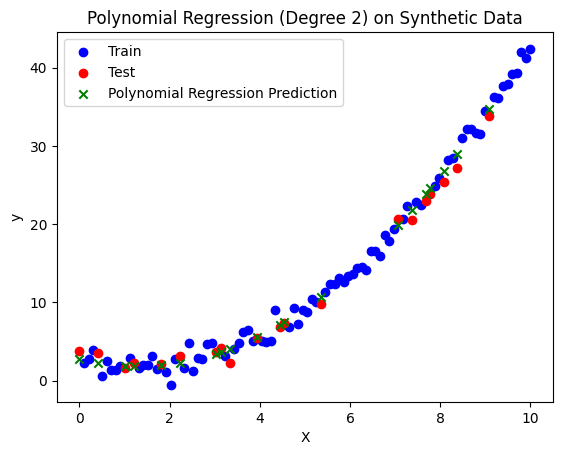

Model Coefficients: [ 0.         -1.4467539   0.54542609]
Model Intercept: 2.825232922619179
Test R^2 Score: 0.991878312024436


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate a synthetic nonlinear dataset
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 0.5 * X**2 - X + 2 + np.random.randn(100)  # Quadratic relationship with noise
X = X.reshape(-1, 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Polynomial Regression
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

# Plot results
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.scatter(X_test, y_pred, color='green', label='Polynomial Regression Prediction', marker='x')
plt.title('Polynomial Regression (Degree 2) on Synthetic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Test R^2 Score:", model.score(X_test_poly, y_test))

ID3 classification

Training accuracy: 1.0


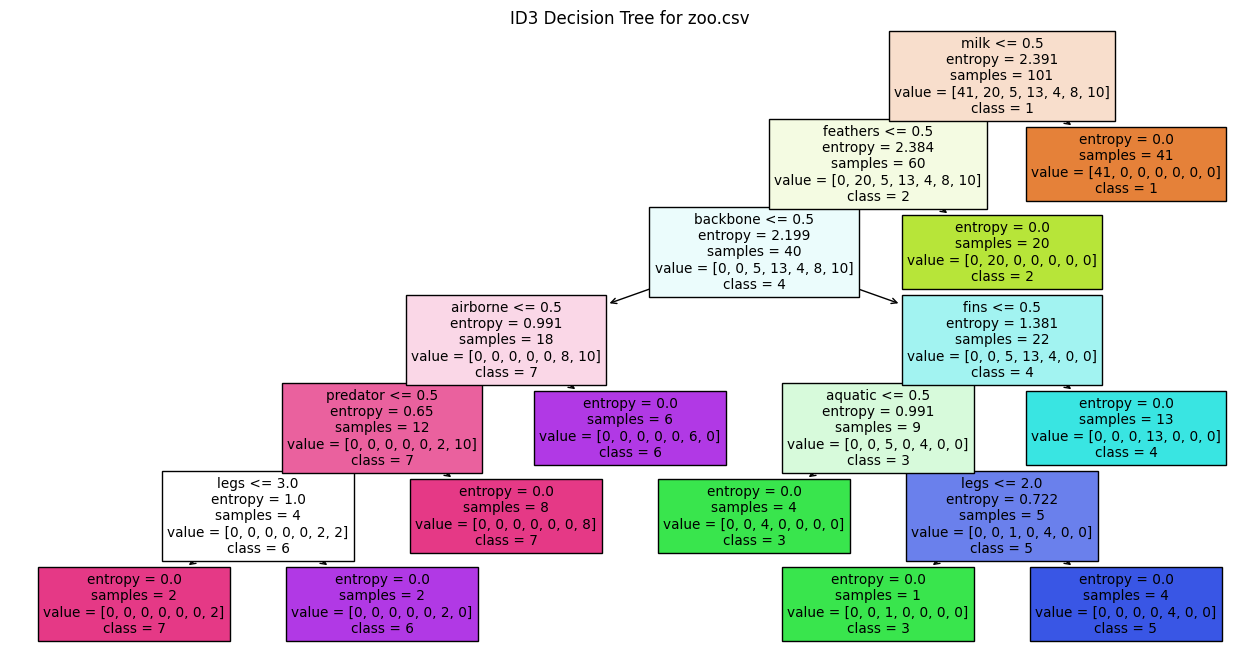

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the zoo dataset
df = pd.read_csv('zoo.csv')

# Assume the last column is the class label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert categorical features to numeric
X_encoded = pd.get_dummies(X)

# Fit ID3 (DecisionTreeClassifier with entropy)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_encoded, y)

# Predict on the training data (for demonstration)
y_pred = clf.predict(X_encoded)
accuracy = (y_pred == y).mean()
print("Training accuracy:", accuracy)

# Plot the tree
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X_encoded.columns, class_names=[str(c) for c in set(y)], filled=True)
plt.title("ID3 Decision Tree for zoo.csv")
plt.show()

Naive Bayes

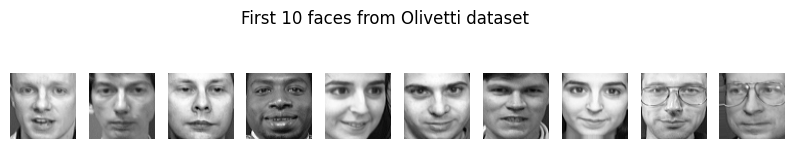

Naive Bayes classification accuracy on Olivetti Faces: 0.8083333333333333


In [18]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Olivetti Face dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
images = faces.images  # shape: (400, 64, 64)
X = faces.data  # shape: (400, 4096)
y = faces.target

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.suptitle("First 10 faces from Olivetti dataset")
plt.show()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes classification accuracy on Olivetti Faces:", accuracy)

Breast Cancer Detection

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Test accuracy
accuracy = knn.score(X_test, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.9415204678362573


Boston Housing dataset

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN regressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# Test R^2 score
score = knn.score(X_test, y_test)
print("Test R^2 score:", score)

Test R^2 score: 0.08708750796268305


California Housing Dataset

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN regressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# Test R^2 score
score = knn.score(X_test, y_test)
print("Test R^2 score:", score)


Test R^2 score: 0.08708750796268305


Synthetic Dataset generation


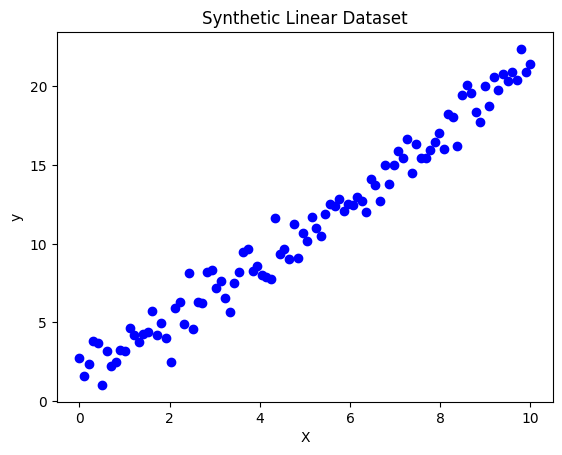

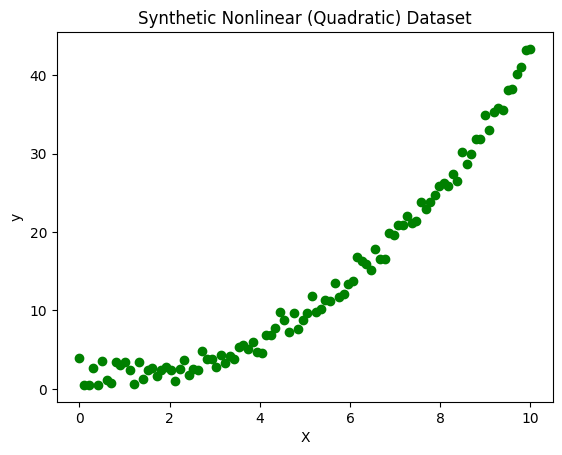

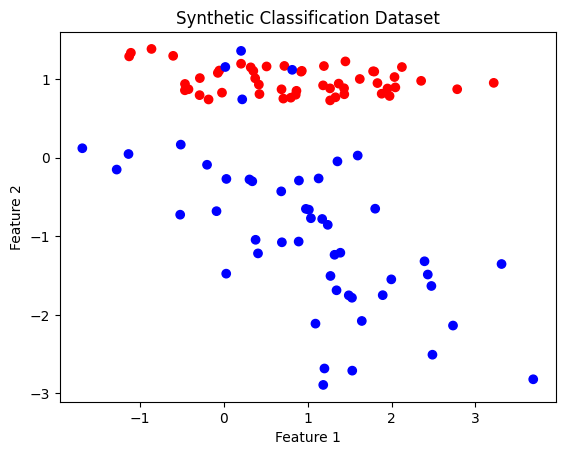

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Synthetic linear dataset (for regression)
np.random.seed(0)
X_linear = np.linspace(0, 10, 100)
y_linear = 2 * X_linear + 1 + np.random.randn(100)  # y = 2x + 1 + noise

plt.figure()
plt.scatter(X_linear, y_linear, color='blue')
plt.title("Synthetic Linear Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# 2. Synthetic nonlinear dataset (for polynomial regression)
X_poly = np.linspace(0, 10, 100)
y_poly = 0.5 * X_poly**2 - X_poly + 2 + np.random.randn(100)  # Quadratic with noise

plt.figure()
plt.scatter(X_poly, y_poly, color='green')
plt.title("Synthetic Nonlinear (Quadratic) Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# 3. Synthetic classification dataset (two classes)
from sklearn.datasets import make_classification

X_class, y_class = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                                       n_clusters_per_class=1, n_classes=2, random_state=0)

plt.figure()
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='bwr')
plt.title("Synthetic Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()